# Orthogonal Matching Pursuit


Orthogonal Matching Pursuit for data compression. Simulations and experiments for real images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Noiseless case

N: 20


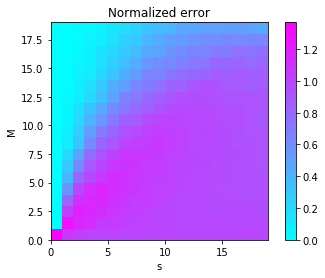

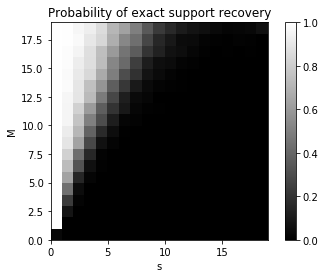

N: 50


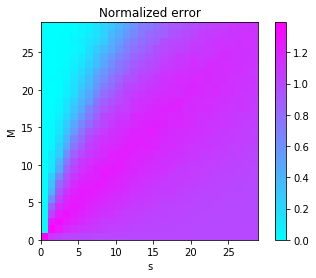

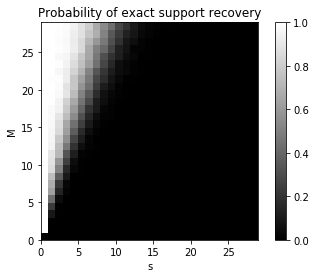

N: 100


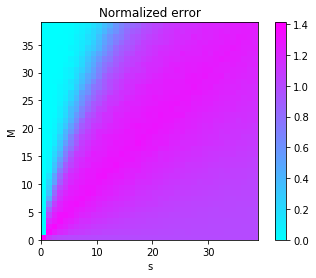

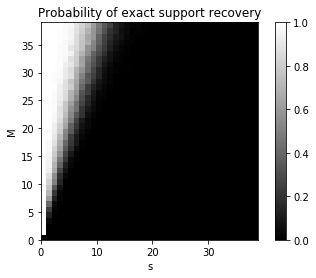

In [35]:
 def orthogonal_matching_pursuit(y, A, s):
    N = A.shape[1]
    ri = y
    S = []
    for i in range(s):
        tmp = ri.T * A
        ni = abs(tmp).argmax()
        S.append(ni)
        a = np.linalg.pinv(A[:, S]) * y
        ri = y - A[:, S] * a
    x_hat = np.matrix(np.zeros([N, 1]))
    x_hat[S] = a
    return x_hat


def show_heatmap(data, title, cmap):
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=cmap)
    cbar = plt.colorbar(heatmap)
    plt.imshow(data, cmap=cmap, interpolation='nearest')
    plt.xlim((0, len(data[0])))
    plt.ylim((0, len(data)))
    #plt.xticks(color="None")
    #plt.yticks(color="None")
    plt.xlabel("s")
    plt.ylabel("M")
    plt.title(title)
    plt.show()
    
def exact_match(x, x_hat):
    for i,j in zip(x,x_hat):
        if (i==0) != (j==0):
            return False
    return True
    
    
n_experiment = 500
step = 1
smax_list = {"20":20, "50":30, "100":40}
mmax_list = {"20":20, "50":30, "100":40}


for N in [20, 50, 100]:
    print("N:", N)
    result_error_array = []
    result_prob_array = []
    smax = smax_list[str(N)]
    mmax = mmax_list[str(N)]
    for M in range(1, mmax, step):
        result_error_row = []
        result_prob_row = []
        for s in range(1, smax, step):
            result_error_tmp = []
            result_count = 0
            for _ in range(n_experiment):
            
                A = np.random.randn(M,N)
                for i in range(N):
                    v = A[:, i]
                    v_len = np.linalg.norm(v)
                    A[:, i] = v/v_len
                A = np.matrix(A)
                x = np.matrix(np.zeros([N, 1]))
                
                idx = np.arange(N)
                idx = np.random.choice(idx, size=s, replace=False)
                for i in idx:
                    x[i] = (-1)**np.random.randint(low=0,high=2) * np.random.uniform(low=1.0, high=10.0)
                
                n = np.matrix(np.zeros([M, 1]))
                y = A*x + n
                x_hat = orthogonal_matching_pursuit(y, A, s)
                normalized_error = np.linalg.norm(x-x_hat)/np.linalg.norm(x)
                result_error_tmp.append(normalized_error)
                if exact_match(x, x_hat):
                    result_count += 1
            
            result_error = sum(result_error_tmp)/len(result_error_tmp)
            result_prob = float(result_count)/n_experiment
            
            result_error_row.append(result_error)
            result_prob_row.append(result_prob)
        result_error_array.append(result_error_row)
        result_prob_array.append(result_prob_row)
    show_heatmap(result_error_array, "Normalized error", "cool")
    show_heatmap(result_prob_array, "Probability of exact support recovery", "gray")
            
            

# Noisy case1

Sigma: 0.1


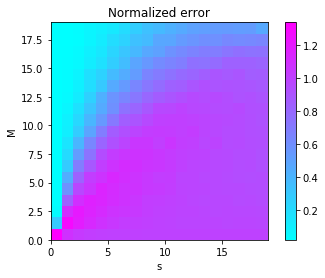

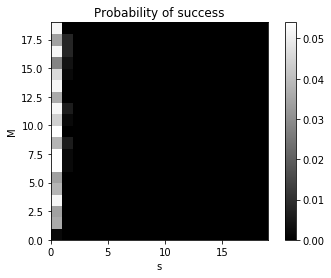

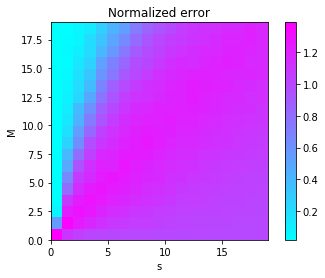

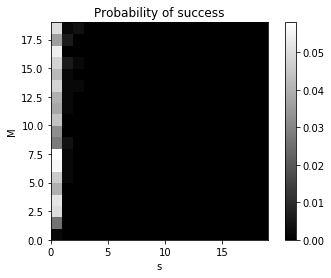

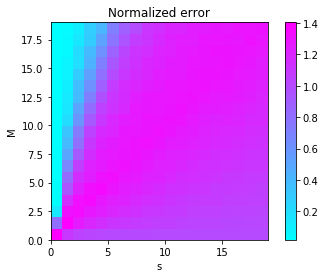

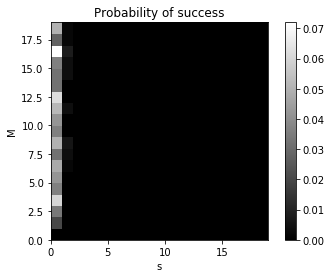

Sigma: 3.0


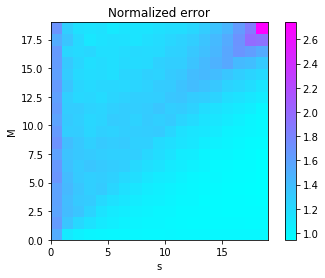

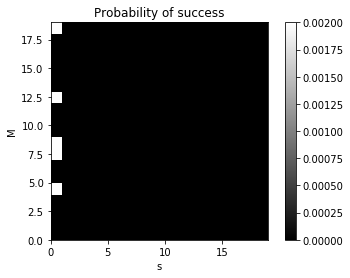

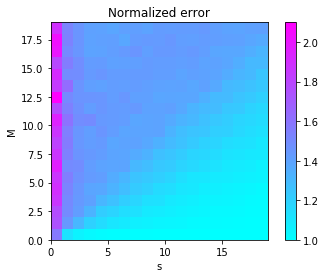

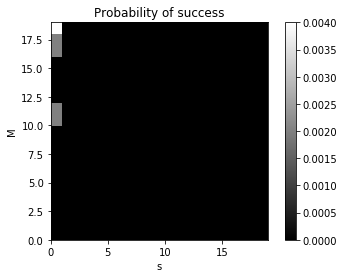

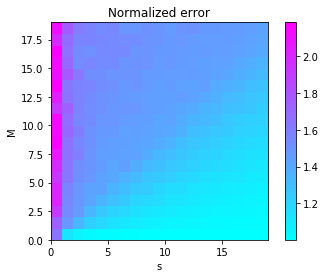

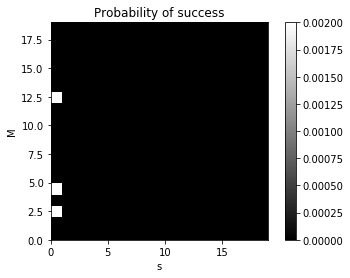

In [46]:
n_experiment = 500
step = 1
smax_list = {"20":20, "50":20, "100":20}
mmax_list = {"20":20, "50":20, "100":20}


for sigma in [0.1, 3.0]:
    print("Sigma:", sigma)
    for N in [20, 50, 100]:
        result_error_array = []
        result_prob_array = []
        smax = smax_list[str(N)]
        mmax = mmax_list[str(N)]
        for M in range(1, mmax, step):
            result_error_row = []
            result_prob_row = []
            for s in range(1, smax, step): 
                result_error_tmp = []
                result_count = 0
                for _ in range(n_experiment):
                
                    A = np.random.randn(M,N)
                    for i in range(N):
                        v = A[:, i]
                        v_len = np.linalg.norm(v)
                        A[:, i] = v/v_len
                    A = np.matrix(A)
                    x = np.matrix(np.zeros([N, 1]))
                    
                    idx = np.arange(N)
                    idx = np.random.choice(idx, size=s, replace=False)
                    for i in idx:
                        x[i] = (-1)**np.random.randint(low=0,high=2) * np.random.uniform(low=1.0, high=10.0)
                
                    n = sigma * np.matrix(np.random.randn(M,1))
                    y = A*x + n
                    x_hat = orthogonal_matching_pursuit(y, A, s)
                    normalized_error = np.linalg.norm(x-x_hat)/np.linalg.norm(x)
                    result_error_tmp.append(normalized_error)
                    if np.linalg.norm(x - x_hat)/np.linalg.norm(x) < 0.001:
                        result_count += 1
                
                result_error = sum(result_error_tmp)/len(result_error_tmp)
                result_prob = float(result_count)/n_experiment
                
                result_error_row.append(result_error)
                result_prob_row.append(result_prob)
            result_error_array.append(result_error_row)
            result_prob_array.append(result_prob_row)
        show_heatmap(result_error_array, "Normalized error", "cool")
        show_heatmap(result_prob_array, "Probability of success", "gray")
            
            

# Noisy case 2 (Unknown sparsity)

Sigma: 0.1


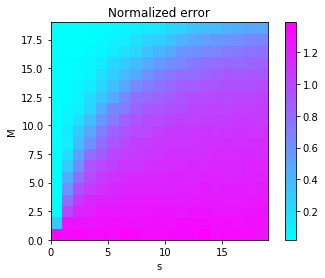

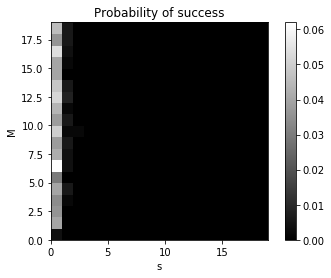

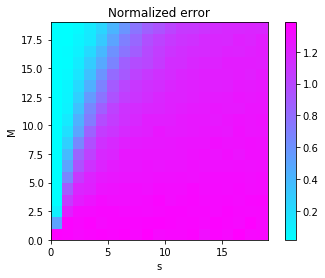

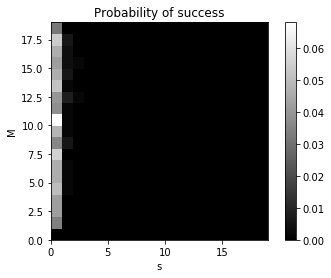

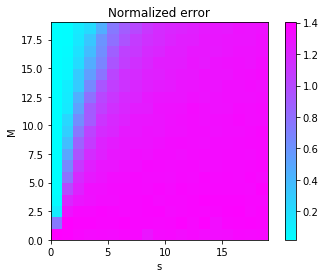

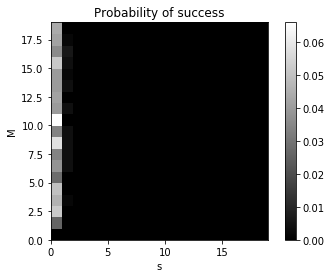

Sigma: 3.0


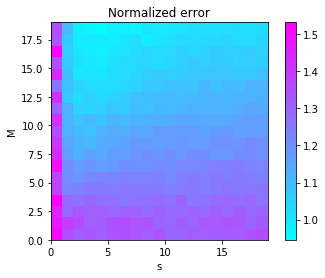

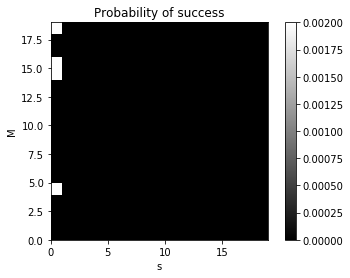

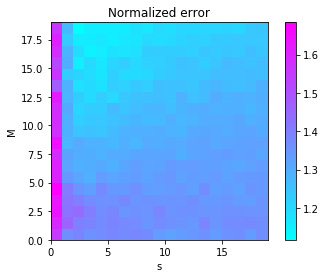

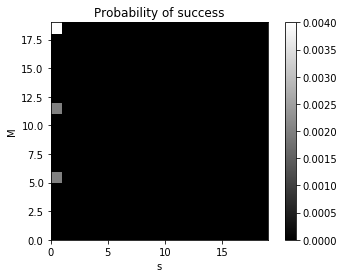

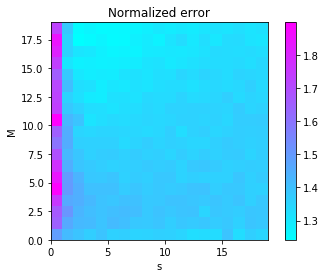

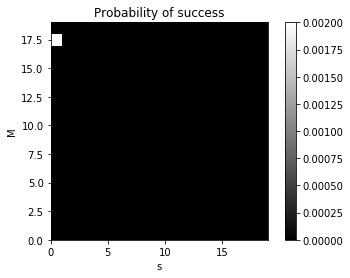

In [47]:
#def orthogonal_matching_pursuit_unknownsparsity(y, A, norm_n):
#    N = A.shape[1]
#    ri = y
#    x_hat = np.matrix(np.zeros([N, 1]))
#    #while (np.linalg.norm(y - A*x_hat) > norm_n):
#    for _ in range(N):
#        if (np.linalg.norm(y - A*x_hat) <= norm_n):
#            break        
#        tmp = ri.T * A
#        ni = abs(tmp).argmax()
#        x_hat[ni, 0] = tmp[0, ni]
#        ri = ri - tmp[0, ni]* A[:, ni]
#    return x_hat

def orthogonal_matching_pursuit_unknownsparsity(y, A, norm_n):
    N = A.shape[1]
    ri = y
    S = []
    x_hat = np.matrix(np.zeros([N, 1]))
    for _ in range(N):
        if (np.linalg.norm(y - A*x_hat) <= norm_n):
            break    
        tmp = ri.T * A
        ni = abs(tmp).argmax()
        S.append(ni)
        a = np.linalg.pinv(A[:, S]) * y
        ri = y - A[:, S] * a
        x_hat[S] = a
    return x_hat


n_experiment = 500
step = 1
smax_list = {"20":20, "50":20, "100":20}
mmax_list = {"20":20, "50":20, "100":20}


for sigma in [0.1, 3.0]:
    print("Sigma:", sigma)
    for N in [20, 50, 100]:
        result_error_array = []
        result_prob_array = []
        smax = smax_list[str(N)]
        mmax = mmax_list[str(N)]
        for M in range(1, mmax, step):
            result_error_row = []
            result_prob_row = []
            for s in range(1, smax, step):
                result_error_tmp = []
                result_count = 0
                for _ in range(n_experiment):
                
                    A = np.random.randn(M,N)
                    for i in range(N):
                        v = A[:, i]
                        v_len = np.linalg.norm(v)
                        A[:, i] = v/v_len
                    A = np.matrix(A)
                    x = np.matrix(np.zeros([N, 1]))
                    
                    idx = np.arange(N)
                    idx = np.random.choice(idx, size=s, replace=False)
                    for i in idx:
                        x[i] = (-1)**np.random.randint(low=0,high=2) * np.random.uniform(low=1.0, high=10.0)
                
                    n = sigma * np.matrix(np.random.randn(M,1))
                    y = A*x + n
                    x_hat = orthogonal_matching_pursuit_unknownsparsity(y, A, np.linalg.norm(n))
                    normalized_error = np.linalg.norm(x-x_hat)/np.linalg.norm(x)
                    result_error_tmp.append(normalized_error)
                    if np.linalg.norm(x - x_hat)/np.linalg.norm(x) < 0.001:
                        result_count += 1
                
                result_error = sum(result_error_tmp)/len(result_error_tmp)
                result_prob = float(result_count)/n_experiment
                
                result_error_row.append(result_error)
                result_prob_row.append(result_prob)
            result_error_array.append(result_error_row)
            result_prob_array.append(result_prob_row)
        show_heatmap(result_error_array, "Normalized error", "cool")
        show_heatmap(result_prob_array, "Probability of success", "gray")
            
            

# Experiment on a real image

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


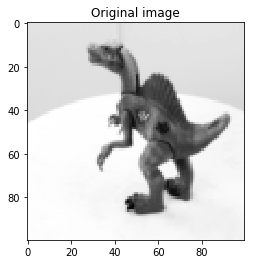

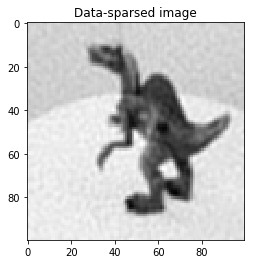

N: 10000
M: 1000  (M/N: 0.1 )
s: 1250  (s/N: 0.125 )


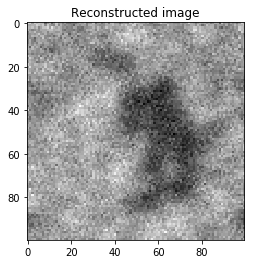

N: 10000
M: 2000  (M/N: 0.2 )
s: 1250  (s/N: 0.125 )


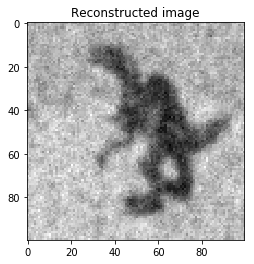

N: 10000
M: 4000  (M/N: 0.4 )
s: 1250  (s/N: 0.125 )


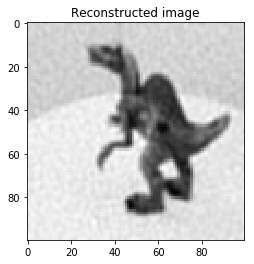

N: 10000
M: 6000  (M/N: 0.6 )
s: 1250  (s/N: 0.125 )


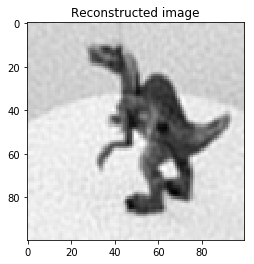

N: 10000
M: 8000  (M/N: 0.8 )
s: 1250  (s/N: 0.125 )


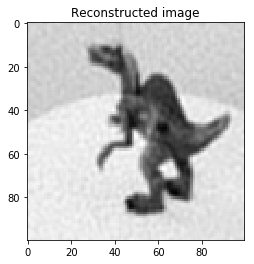

In [45]:
from scipy.misc import imread
from scipy.misc import imresize
from scipy.fftpack import dct, idct

image_size = 100
n_coefficients = int(image_size*image_size/8)

data = imread('dino0.png')
data = np.dot(data[...,:3], [0.299, 0.587, 0.114])
#data = data[::3,::3]
data = imresize(data, [image_size, image_size])
plt.imshow(data, cmap='gray')
plt.title("Original image")
plt.show()
datadct = dct(dct(data.T).T)
data_essential = np.zeros(data.shape)

for i in range(n_coefficients):
    idx = abs(datadct).argmax()
    idx = np.unravel_index(idx, datadct.shape)
    data_essential[idx] = datadct[idx]
    datadct[idx] = 0 
    
data_essential = np.reshape(data_essential, data.shape[0]*data.shape[1])


data_degraded = np.reshape(data_essential, data.shape)
data_degraded = idct(idct(data_degraded.T).T)
plt.imshow(data_degraded, cmap='gray')
plt.title("Data-sparsed image")
plt.show()

N = data_essential.shape[0]
s = n_coefficients

for i in [1,2,4,6,8]:
    M = int(i*N/10)  
    print("N:", N)
    print("M:", M, " (M/N:", i/10, ")")
    print("s:", s, " (s/N:", s/N, ")")
    
    A = np.random.randn(M,N)
    for j in range(N):
        v = A[:, j]
        v_len = np.linalg.norm(v)
        A[:, j] = v/v_len
    A = np.matrix(A)
    x = np.matrix(data_essential).T
    y = A*x
    x_hat = orthogonal_matching_pursuit(y, A, s)
    
    data_essential_hat = x_hat.T
    data_essential_hat = np.reshape(data_essential_hat, data.shape)
    data_reconstructed = idct(idct(data_essential_hat.T).T)
    plt.imshow(data_reconstructed, cmap='gray')
    plt.title("Reconstructed image")
    plt.show()


## Approach

1. Read the original image and reshape it to 100x100 gray-scale data
1. Transform it by Discrete Cosine Transformation
1. Make it sparse by picking the s significant(largest in absolute value) coefficients
1. Compress the sparse array with M*N random matrix
1. Decompress the image with the OMP method.
1. Output the data transformed by Inverse Discrete Cosine Transformation
